# Entanglement Classifier Trial Notebook

### Importing Dependencies

In [1]:
import numpy as np

from classifier.components.system import System
from classifier.components.interaction import InteractionFactory, Interaction
from classifier.components.model import Model
from classifier.components.interaction_functions import CascadeFunction, EnergyExchangeFunction, DampingFunction

from quantum.core import GeneralQubitMatrixGen, DensityMatrix

### Setting up the system

In [2]:
reservoir_nodes=3
system_nodes=2

In [3]:
"""
Defining System setup
"""
random_num = np.random.rand()

gen = GeneralQubitMatrixGen()

if random_num >= 0.5:
    system_state = gen.generateState(n_qubits=system_nodes)
elif random_num < 0.5:
    system_state = gen.generateSeparableState(n_qubits=system_nodes)
system_node_list = [0, 1]

if len(system_node_list) != system_nodes:
    raise Exception

system_interactions = {}

system = System(
    init_quantum_state=system_state, nodes=system_node_list, interactions=system_interactions
)

In [4]:
system_state.negativity()

0.0

### Setting up the interface

In [5]:

"""
Defining Interface setup
"""

interfaceFactory1 = InteractionFactory(EnergyExchangeFunction, coupling_strength=0.5)
interfaceFactory2 = InteractionFactory(EnergyExchangeFunction, coupling_strength=0)

### Setting up the reservoir

In [6]:
"""
Defining Reservoir setup
"""

reservoirFactory1 = InteractionFactory(EnergyExchangeFunction, coupling_strength=1)

### Setting up the model

In [7]:
model = Model()
model.setSystem(system)
model.setReservoirInteractionFacs(dualFactories=[reservoirFactory1], singleFactories=[])
model.setInterfaceInteractionFacs([[interfaceFactory1, interfaceFactory2]])
model.generateReservoir(reservoir_nodes, init_quantum_state=0, interaction_rate=.7)
model.generateInterface(interaction_rate=.6)
model.setRunDuration(10)
model.setRunResolution(0.2)
model.setSwitchStructureTime(1)


{0: (0, 0.5), 1: (0, -0.5), 2: (1.256855174522606, 0.6691306063588585), 3: (2.9510565162951536, 0.30901699437494773), 4: (1.7920883091822417, -0.9781476007338058)}


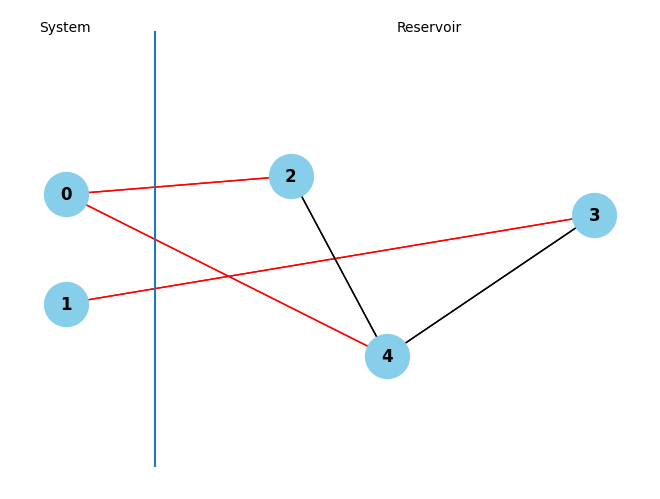

In [8]:
model.draw()

### Running the model

In [ ]:
model.setRunResolution(0.2)

In [100]:
model.runge_kutta_a = [[0,0,0,0],[1/2,0,0,0],[0,1/2,0,0],[0,0,1,0]]
model.runge_kutta_b = [1/6,1/3,1/3,1/6]

In [101]:
model.system.init_quantum_state = system_state
model.run()

In [102]:
log1 = model.modelLog

In [103]:
model.setSwitchStructureTime(10)
model.run()

In [104]:
log2 = model.modelLog

### Plotting results

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


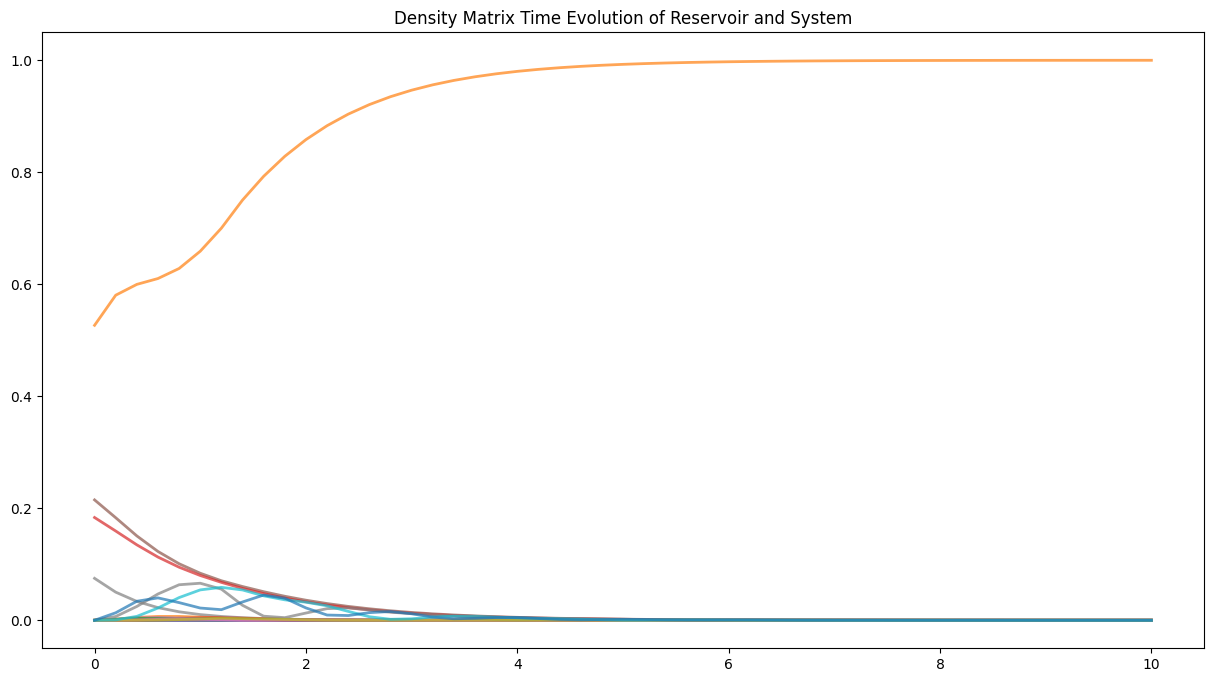

In [105]:
log1.plotResAndSys(legend=False)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


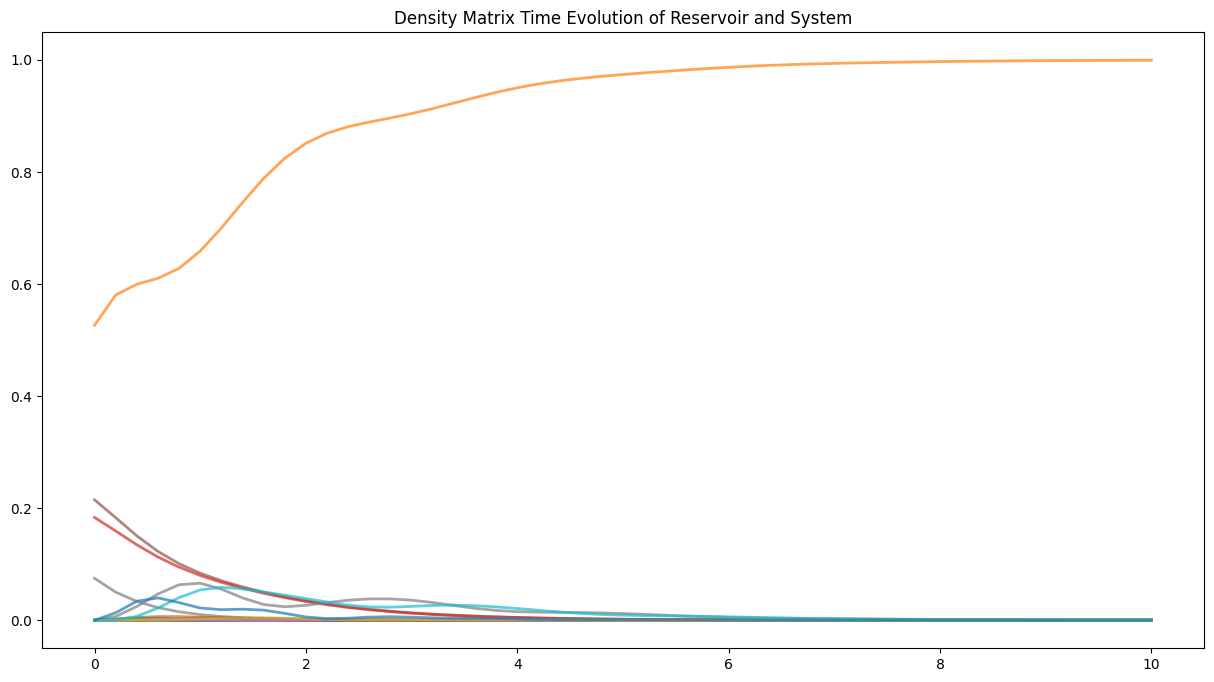

In [106]:
log2.plotResAndSys(legend=False)

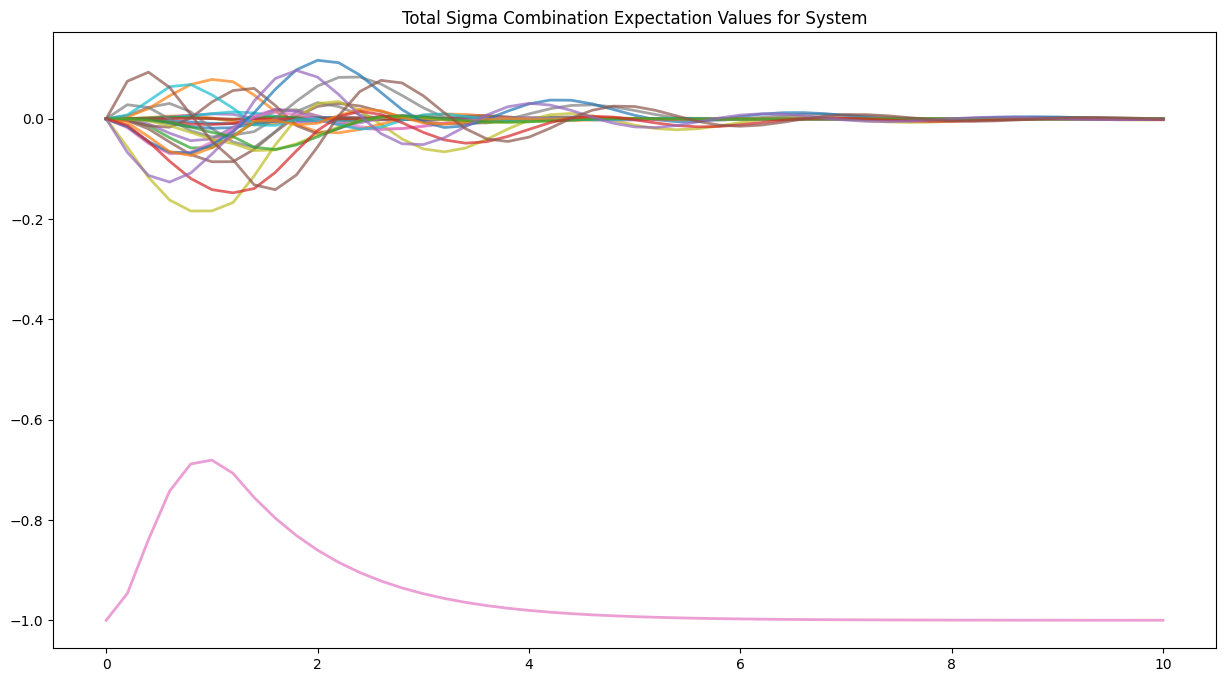

In [107]:
log1.plotSigmaCombinations(legend=False)

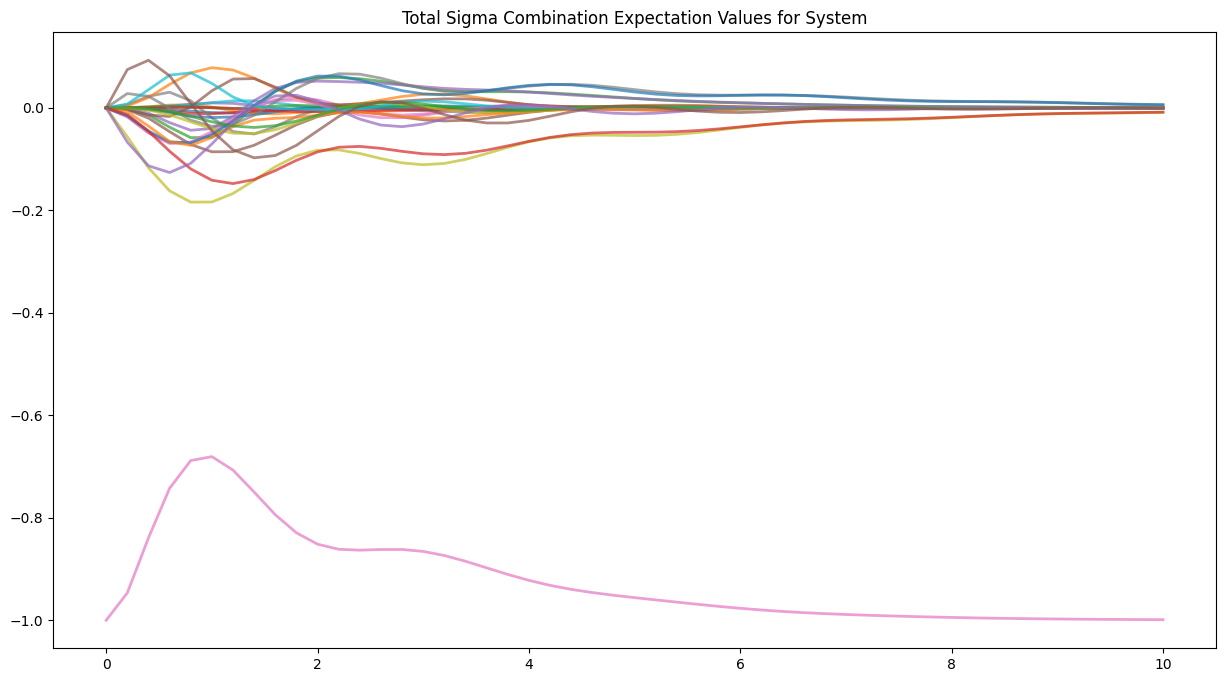

In [108]:
log2.plotSigmaCombinations(legend=False)